# Climate Change Belief Analysis 2022 - Team ZF2

© Explore Data Science Academy

---

###### Team Members

1. Abubakar Abdulkadir
2. Joseph Mugo
3. Philip Ogunmola
4. Rogers Mugambi
5. Adewale Nana
6. Philip Wambua

---

## Overview

<img src="images/climate.jpg"/>

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, this notebook provides a walthrough the creation of a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

---

## Table of Contents     <a id="content"></a>

<a href=#1>1. Importing Packages</a>

<a href=#2>2. Loading Data</a>

<a href=#3>3. Data Cleaning and Preprocessing</a>

<a href=#4>4. Exploratory Data Analysis (EDA)</a>

<a href=#5>5. Data Engineering</a>

<a href=#6>6. Modeling</a>

<a href=#7>7. Model Performance </a>

<a href=#8>8. Model Explanation </a>

<a href=#9>9. Model Deployment </a>

## 1.0 Importing Packages 

<a href=#content>Back to Table of Contents</a>

    
| Description |
| :--------------------------- |
| In this section, the packages and libraries required to carry out data loading, text processing; data engineering and visualisation; model building and evaluation are imported . |

In [79]:
# Data loading and Text processing
import numpy as np
import pandas as pd
import re
import string
import nltk

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling and Evaluation

<br />

## 2.0 Loading Data

<a href=#content>Back to Table of Contents</a>

    
| Description |
| :--------------------------- |
| The training and testing datasets are loaded from the `train` and `test_with_no_labels` csv files into respective DataFrames. Both datasets accompany this notebook and are available in the data subfolder. |

In [224]:
# read train dataset
df_train = pd.read_csv('data/train.csv')

# read test dataset
df_test = pd.read_csv('data/test_with_no_labels.csv')

For this project, Pandas library will be used to access and manipulate the datasets. Hence, the training and testing datasets are loaded using the pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html"> read_csv</a> method. The read_csv method returns a dataframe. Dataframe is a native data structure of the Pandas library which provides easier and visually appealling means of handling data. <br ><br>

## 3.0 Exploratory Data Analysis

<a href=#content>Back to Table of Contents</a>

    
| Description |
| :--------------------------- |
| In this section, the dataset was explored to derive useful insight which will guide in the data engineering and modeling phase.|

---

### 3.1 Quick Overview of the Dataset

In [225]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


To have a quick overview of the dataset, the pandas<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head"> DataFrame.head </a> method was used to display the first five rows of the train dataset. It is immediately obvious that the dataset contains two predictors; message and tweetid with a target variable.
<br /><br />

In [226]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The dataset contains 15,819 entries with no null values. Hence, the shape of the dataset can be deduced to be (15819, 3) <br /><br />

### 3.2 Target  Variable

In [227]:
# Count class
category_counts = df_train['sentiment'].value_counts()
category_counts

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

There are four distinct Class Descriptions present in the train data. Hence the the problem is a multi-class classification problem. 
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

#### 3.2.1 Distribution of Target

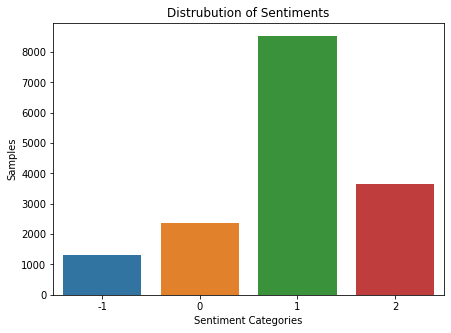

In [228]:
fig, ax = plt.subplots(figsize = (7, 5))
target =df_train['sentiment'].value_counts()
sns.barplot(x=target.index, y=target, ax=ax)
plt.title("Distrubution of Sentiments")
plt.xlabel('Sentiment Categories')
plt.ylabel("Samples")
plt.show()

The distribution indicates that there is a category imbalance in the train dataset. The effect of this imbalance, if not attended to, is a model which performs very well at categorising samples of a particular category and fails at others. For an instance, a model built on this train data will perform well in categorising tweets which supports man-made climate change (1) but fails at classifying the Anti tweets. <br /><br />

### 3.3 Features

From the overview of the data carried out prior, there are two features in the dataset. The message and tweetId features. The tweeteId is numerical while the message is object.

#### 3.3.1 The tweetid feature

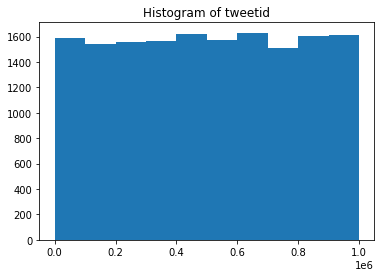

In [229]:
plt.hist(df_train['tweetid'])
plt.title("Histogram of tweetid")
plt.show()

The distribution of the tweetid feature is almost uniform. This feature contains unique value for all samples. Hence will not be very useful for modelling. Hence, this feature will be dropped. <br /><br />

#### 3.3.2 The message feature

The message feature contains natural language. Hance character, word and sentence level analysis is carried out. <br /><br />

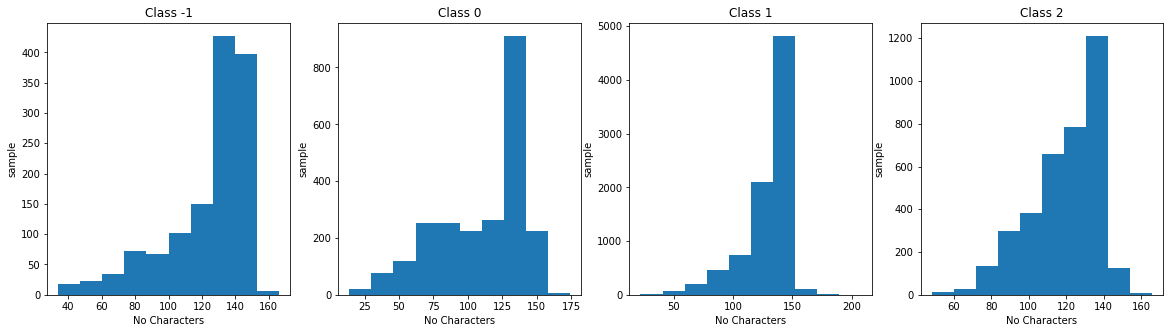

In [230]:
# Distribution of length of tweets per Class
fig, ax = plt.subplots(1,4, figsize=(20,5))
categories = [-1, 0, 1, 2]
groups = df_train.groupby('sentiment')

for i, category in enumerate(categories):
    messages = groups.get_group(category)['message']
    length = messages.str.len()
    ax[i].hist(length)
    ax[i].set_ylabel("sample")
    ax[i].set_title("Class " + str(category))
    ax[i].set_xlabel("No Characters")

The distribution of tweets in the different sentiment class looks similar. Most tweets in each category have between 120 to 150 characters. <br /><br />

In [243]:
 def create_character_set(dataset, category=""):
    '''
        Creates a list of all the characters in the message feature
        
        Input:
        dataset - A dataset to extract characters from
        category - Filters the considered messages by specified category 
        
        Output:
        pandas DataFrame of all the characters of the specified category 
    '''
    corpus = []
    if category:
        df = dataset[dataset['sentiment'] == category]['message']
    else:
        df = dataset['message']
        
    words = [row[x] for row in df for x in range(len(row))]
    return pd.DataFrame(words)

      22423
e     12427
a     10806
t     10168
o      8243
i      7843
n      7612
s      6571
l      6296
r      6294
h      5275
c      4962
m      4015
g      3825
d      3224
u      2784
p      2534
b      2318
w      2305
y      1867
.      1862
/      1643
f      1621
T      1500
@      1389
:      1365
R      1032
v       971
'       960
k       958
S       777
A       648
C       577
I       550
,       543
N       531
O       443
…       433
D       431
P       424
M       418
E       409
G       364
W       362
L       349
x       343
0       335
B       331
1       306
\n      304
dtype: int64

In [233]:
df = df_train[df_train['sentiment'] == 2]
df.head()

,sentiment,message,tweetid
2,2,RT @RawStory: Researchers say we have three ye...,698562
12,2,RT @tveitdal: We only have a 5 percent chance ...,454673
14,2,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092
26,2,Bangladesh confronting climate change head on ...,365291
32,2,RT @latimes: Atmospheric rivers fueled by clim...,143471


In [234]:
all_links = []

for tweet in df.iterrows():
    urls = re.findall('(?P<url>https?://[^\s]+)', tweet[1][1])
    all_links.extend(urls)
    
nw = pd.DataFrame(all_links)

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


https://t.co/…             30
https://t.c…               30
https://t.…                29
https://t…                 26
https://t.co…              21
                           ..
https://t.co/rASODRTr3T     2
https://t.co/9rOdiHqYjH     2
https://t.co/Z2xLWdaJA1     2
https://t.co/MB3jpJY3Mn     2
https://t.co/J5aV9Hzoj8     2
Length: 84, dtype: int64

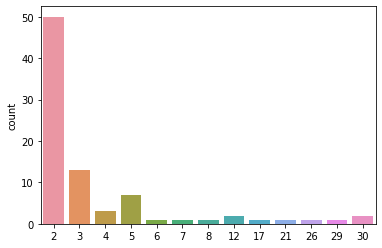

In [235]:
x = nw.value_counts()
x = x[x != 1]
sns.countplot(x)
x

In [236]:
df.shape

(3640, 3)